## Objective: to classify the gender (male or female) on the basis of various feature of the voices

In [0]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [0]:
data=pd.read_csv("voice.csv") # reading the dataset

In [0]:
data.head(25)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1100,0.198308,0.060483,0.220634,0.137429,0.253823,0.116394,1.438620,5.002659,0.903695,0.321622,0.255225,0.198308,0.135740,0.050420,0.275862,1.005632,0.023438,4.218750,4.195312,0.190660,male
2378,0.236232,0.041141,0.244934,0.227932,0.260342,0.032410,2.175879,7.324086,0.831379,0.235322,0.243340,0.236232,0.179134,0.049896,0.274286,1.379012,0.023438,10.617188,10.593750,0.103917,female
188,0.128337,0.083163,0.122667,0.053867,0.202933,0.149067,1.900327,8.405812,0.961016,0.736413,0.108533,0.128337,0.110157,0.017094,0.228571,0.231120,0.015625,3.539062,3.523438,0.099489,male
2473,0.198333,0.057894,0.213907,0.197953,0.232465,0.034512,2.624526,9.595826,0.876050,0.400094,0.232465,0.198333,0.175645,0.048000,0.277457,1.379788,0.023438,6.351562,6.328125,0.089719,female
2659,0.199178,0.037218,0.202939,0.170663,0.223919,0.053256,1.831584,5.954724,0.871826,0.230948,0.223112,0.199178,0.161332,0.049793,0.265193,1.397727,0.023438,8.484375,8.460938,0.110876,female
1252,0.175510,0.062114,0.180254,0.129669,0.223715,0.094046,1.003862,3.229805,0.945117,0.585704,0.186667,0.175510,0.135104,0.047151,0.268156,1.048594,0.023438,4.453125,4.429688,0.152778,male
221,0.174940,0.061581,0.197176,0.115496,0.221190,0.105694,1.729981,6.581619,0.927651,0.462425,0.215146,0.174940,0.111501,0.018519,0.275862,0.387939,0.007812,0.914062,0.906250,0.216667,male
888,0.186119,0.058504,0.170777,0.136247,0.242091,0.105845,1.275123,3.854429,0.908131,0.361052,0.140751,0.186119,0.125718,0.048193,0.275862,0.696934,0.023438,12.023438,12.000000,0.056807,male
78,0.200042,0.055815,0.210792,0.166599,0.243478,0.076879,2.926781,15.253787,0.914634,0.412919,0.240643,0.200042,0.159107,0.020101,0.266667,0.622656,0.156250,6.390625,6.234375,0.119744,male
1090,0.200351,0.058855,0.221912,0.138865,0.251864,0.112998,2.012337,7.724104,0.905513,0.320267,0.257763,0.200351,0.122073,0.047244,0.277457,1.117188,0.023438,8.085938,8.062500,0.123887,male


In [0]:
# shuffling the dataset
data=shuffle(data)

In [0]:
# separating the dependent and independent variables
x=np.array(data.drop('label',axis=1).copy())
y=np.array(data['label']).reshape(len(data),1)

# Label Encoding of *y*

In [0]:
np.unique(y)

array(['female', 'male'], dtype=object)

In [0]:
y[y=='male']=0
y[y=='female']=1
print(np.unique(y))

[0 1]


In [0]:
print(x.shape)
print(y.shape)

(3168, 20)
(3168, 1)


In [0]:
 # splitting the dataset into training and testing part
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [0]:
# creating tensorflow placeholders
num_of_features=x_train.shape[1]
x_PH=tf.placeholder(dtype=tf.float64,shape=[None,num_of_features])

y_PH=tf.placeholder(dtype=tf.float64,shape=[None,1])

In [0]:
# Making Tensorflow Variables for Slopes(Weights) & intercepts(Bias)

input_neuron_num=20
hidden1_neuron_num=50
output_neuron_num=1

# FOR Weights and Bias Between Input Layer and first Hidden layer
weight_IH1 = np.random.randn(input_neuron_num,hidden1_neuron_num)
weight_IH1 = tf.Variable(weight_IH1)
bias_IH1 = random.random()
bias_IH1 = tf.cast(bias_IH1, tf.float64) # Since bias values are float32 , and tensors accept only float 64, we're converting all bias values to float64
bias_IH1 = tf.Variable(bias_IH1)



# FOR Weights and Bias Between first Hidden layer and final output Layer 
weight_H1O = np.random.randn(hidden1_neuron_num,output_neuron_num)
weight_H1O = tf.Variable(weight_H1O)
bias_H1O = random.random()
bias_H1O = tf.cast(bias_H1O, tf.float64) 
bias_H1O = tf.Variable(bias_H1O)

In [0]:
# joining the neuron by dot products
L1Out = tf.matmul(x_PH, weight_IH1)+bias_IH1  # Liout = x_PH * weight_IH1 + bias_IH1 
L1Out= tf.nn.sigmoid(L1Out)   # applying Relu Activation Fucntion

L2Out = tf.matmul(L1Out, weight_H1O)+bias_H1O # L2out= L1Out * weight_H1O + bias_H1O
y_output=tf.nn.sigmoid(L2Out)    # applying sigmoid Activation Fucntion

In [0]:
loss = tf.reduce_mean((y_output - y_PH)**2)    # loss function

optimizer = tf.train.AdamOptimizer()   #Setting up Adam optimizer

In [0]:
minimizer = optimizer.minimize(loss)  # Minimising cost by setting up cost inside optimizer

In [0]:
initialisation = tf.global_variables_initializer()
session = tf.Session()
session.run(initialisation)

In [0]:
#  creating feed dictionaries to feed the data into the neural networl
training_feedDict = {x_PH : np.array(x_train),y_PH : np.array(y_train)}
testing_feedDict = {x_PH : np.array(x_test),y_PH : np.array(y_test)}

In [0]:
def accuracy(prediction,y):   # accuracy evaluation 
  prediction[prediction>=0.5]=1
  prediction[prediction<0.5]=0
  return (len(y[prediction==y])/len(y))*100

**************RESULTS****************
loss                       :  0.02 %
accuracy on training data  : 98.42 %
accuracy on testing data   : 97.48 %


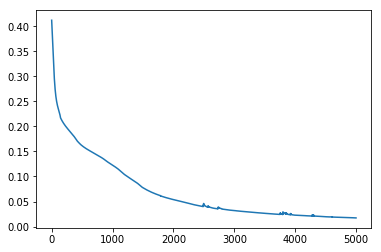

In [0]:
#  training NN

epochs = 5000
error = []
for epoch in range(epochs):  
  session.run(minimizer, feed_dict = training_feedDict)
  error.append(session.run(loss,feed_dict = training_feedDict))

  clear_output(True)
  print("Epoch  : ",epoch,"        loss :",session.run(loss,feed_dict = training_feedDict))
  print("accuracy on training data  : ",accuracy(session.run(y_output,feed_dict = training_feedDict),y_train))
  print("accuracy on testing data  : ",accuracy(session.run(y_output,feed_dict = testing_feedDict),y_test))
clear_output(True)
plt.plot(error)
print("**************RESULTS****************")
print("loss                       :  {0:.2f} %".format(session.run(loss,feed_dict = training_feedDict)))
print("accuracy on training data  : {0:.2f} %".format(accuracy(session.run(y_output,feed_dict = training_feedDict),y_train)))
print("accuracy on testing data   : {0:.2f} %".format(accuracy(session.run(y_output,feed_dict = testing_feedDict),y_test)))